In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("/kaggle/input/llm-classification-finetuning/train.csv")
df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [3]:
df_test = pd.read_csv("/kaggle/input/llm-classification-finetuning/test.csv")
df_test.head()

,id,prompt,response_a,response_b
0,136060,"[""I have three oranges today, I ate an orange ...","[""You have two oranges today.""]","[""You still have three oranges. Eating an oran..."
1,211333,"[""You are a mediator in a heated political deb...","[""Thank you for sharing the details of the sit...","[""Mr Reddy and Ms Blue both have valid points ..."
2,1233961,"[""How to initialize the classification head wh...","[""When you want to initialize the classificati...","[""To initialize the classification head when p..."


In [4]:
len(df)

57477

In [5]:
len(df_test)

3

In [6]:
df.describe()

,id,winner_model_a,winner_model_b,winner_tie
count,5.747700e+04,57477.000000,57477.000000,57477.000000
mean,2.142564e+09,0.349079,0.341911,0.309011
std,1.238327e+09,0.476683,0.474354,0.462090
min,3.019200e+04,0.000000,0.000000,0.000000
25%,1.071821e+09,0.000000,0.000000,0.000000
50%,2.133658e+09,0.000000,0.000000,0.000000
75%,3.211645e+09,1.000000,1.000000,1.000000
max,4.294947e+09,1.000000,1.000000,1.000000


In [7]:
df_test.describe()

,id
count,3.000000e+00
mean,5.271180e+05
std,6.132999e+05
min,1.360600e+05
25%,1.736965e+05
50%,2.113330e+05
75%,7.226470e+05
max,1.233961e+06


In [8]:
df.isna().sum()

id                0
model_a           0
model_b           0
prompt            0
response_a        0
response_b        0
winner_model_a    0
winner_model_b    0
winner_tie        0
dtype: int64

In [9]:
df_test.isna().sum()

id            0
prompt        0
response_a    0
response_b    0
dtype: int64

In [10]:
print(df["prompt"].iloc[0])

["Is it morally right to try to have a certain percentage of females on managerial positions?","OK, does pineapple belong on a pizza? Relax and give me fun answer."]


In [11]:
type(df["prompt"].iloc[0])

str

In [12]:
print(df["response_a"].iloc[0])

["The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness, equality, diversity, and discrimination.\n\nHere are some arguments in favor of and against such policies:\n\n**Arguments in favor:**\n\n1. **Correcting Historical Inequities:** Women have historically been underrepresented in leadership roles due to various cultural, institutional, and social barriers. Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination.\n\n2. **Promoting Diversity:** Diverse leadership teams can enhance decision-making and represent a broader range of perspectives. This can lead to better outcomes for organizations and society as a whole.\n\n3. **Equality of Opportunity:** Setting targets for female representation in management can help ensure that women have equal opportunities to advance in their careers.\n\n4. **Role Modeling:

In [13]:
type(df["response_a"].iloc[0])

str

In [14]:
print(df["response_b"].iloc[0])

["As an AI, I don't have personal beliefs or opinions. However, I can tell you that the question of gender quotas in managerial positions is a complex one and positions can vary. Advocates argue that such measures can help correct historical imbalances, promote diversity, and may lead to better decision-making. Critics may argue that positions should be based purely on merit, and that quotas could potentially lead to tokenism or unqualified candidates being promoted. Morality can be subjective and differs from person to person based on their personal beliefs, cultural background, and values. It's a topic with valid arguments on both sides, and it's up to each individual or organization to decide what they believe is right.","As an AI, I don't eat, so I don't have personal preferences. But, in the world of pizza, the pineapple topping is a hotly debated topic! Some people love the sweet and savory mix it brings to a pizza, a flavor combination made famous by the Hawaiian pizza. Others f

In [15]:
type(df["response_b"].iloc[0])

str

In [16]:
df['response_a'] = df['prompt'] + ' ' + df['response_a']
df['response_b'] = df['prompt'] + ' ' + df['response_b']

In [17]:
df_test['response_a'] = df_test['prompt'] + ' ' + df_test['response_a']
df_test['response_b'] = df_test['prompt'] + ' ' + df_test['response_b']

In [18]:
def removeSpecialChars(text):
    text = text.replace("\\n", " ")
    text = re.sub(r'\\u[0-9a-fA-F]{4}', '', text)
    return re.sub(r'[^\w\s]', '', text)  # Replaces non-word characters with space

df['response_a'] = df['response_a'].apply(removeSpecialChars)
df['response_b'] = df['response_b'].apply(removeSpecialChars)

df_test['response_a'] = df_test['response_a'].apply(removeSpecialChars)
df_test['response_b'] = df_test['response_b'].apply(removeSpecialChars)

In [19]:
df.drop(['prompt', 'id', "model_a", "model_b"], axis=1, inplace=True)

In [20]:
print(df["response_a"].iloc[0])

Is it morally right to try to have a certain percentage of females on managerial positionsOK does pineapple belong on a pizza Relax and give me fun answer The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness equality diversity and discrimination  Here are some arguments in favor of and against such policies  Arguments in favor  1 Correcting Historical Inequities Women have historically been underrepresented in leadership roles due to various cultural institutional and social barriers Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination  2 Promoting Diversity Diverse leadership teams can enhance decisionmaking and represent a broader range of perspectives This can lead to better outcomes for organizations and society as a whole  3 Equality of Opportunity Setting targets for female representation in manage

In [21]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 15.1 MB/s eta 0:00:00


In [22]:
!pip install "lightning-flash"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.3/216.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 32.4 MB/s eta 0:00:00
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 1.6.1
    Uninstalling torchmetrics-1.6.1:
      Successfully uninstalled torchmetrics-1.6.1
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 2.5.0.post0
    Uninstalling pytorch-lightning-2.5.0.post0:
      Successfully uninstalled pytorch-lightning-2.5.0.post0


In [23]:
import numpy as np
import flash
from flash.text import TextEmbedder, TextClassificationData
import torch

/usr/local/lib/python3.10/dist-packages/flash/__init__.py:21: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/usr/local/lib/python3.10/dist-packages/flash/__init__.py:21: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [24]:
model_a_strs = list(df["response_a"])

model = TextEmbedder(backbone="sentence-transformers/all-MiniLM-L6-v2")

datamodule = TextClassificationData.from_lists(
    predict_data=model_a_strs,
    batch_size = 32,
)
trainer = flash.Trainer(gpus=torch.cuda.device_count())

model_a_strs_enc = trainer.predict(model, datamodule=datamodule)

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Predicting: 0it [00:00, ?it/s]

In [25]:
model_a_strs = list(df["response_b"])

model = TextEmbedder(backbone="sentence-transformers/all-MiniLM-L6-v2")

datamodule = TextClassificationData.from_lists(
    predict_data=model_a_strs,
    batch_size = 32,
)
trainer = flash.Trainer(gpus=torch.cuda.device_count())

model_b_strs_enc = trainer.predict(model, datamodule=datamodule)

Predicting: 0it [00:00, ?it/s]

In [26]:
model_a_strs = list(df_test["response_a"])

model = TextEmbedder(backbone="sentence-transformers/all-MiniLM-L6-v2")

datamodule = TextClassificationData.from_lists(
    predict_data=model_a_strs,
    batch_size = 32,
)
trainer = flash.Trainer(gpus=torch.cuda.device_count())

model_a_strs_enc_test = trainer.predict(model, datamodule=datamodule)

Predicting: 0it [00:00, ?it/s]

In [27]:
model_a_strs = list(df_test["response_b"])

model = TextEmbedder(backbone="sentence-transformers/all-MiniLM-L6-v2")

datamodule = TextClassificationData.from_lists(
    predict_data=model_a_strs,
    batch_size = 32,
)
trainer = flash.Trainer(gpus=torch.cuda.device_count())

model_b_strs_enc_test = trainer.predict(model, datamodule=datamodule)

Predicting: 0it [00:00, ?it/s]

In [28]:
len(model_a_strs_enc)

1797

In [29]:
import itertools

# Concatenate all sublists
model_a_strs_enc = list(itertools.chain(*model_a_strs_enc))
model_b_strs_enc = list(itertools.chain(*model_b_strs_enc))

model_a_strs_enc_test = list(itertools.chain(*model_a_strs_enc_test))
model_b_strs_enc_test = list(itertools.chain(*model_b_strs_enc_test))

In [30]:
len(model_a_strs_enc)

57477

In [31]:
type(model_a_strs_enc)

list

In [32]:
len(model_a_strs_enc[0])

384

In [33]:
384*2

768

In [34]:
features = np.hstack([
    np.stack([t.numpy() for t in model_a_strs_enc]), 
    np.stack([t.numpy() for t in model_b_strs_enc])
])

df_preprocess = pd.DataFrame(features)
df_preprocess["winner_model_a"] = df["winner_model_a"]
df_preprocess["winner_model_b"] = df["winner_model_b"]
df_preprocess["winner_tie"] = df["winner_tie"]

df_preprocess.head()

,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,winner_model_a,winner_model_b,winner_tie
0,0.131235,-0.054543,-0.130504,0.017482,-0.149093,0.095146,-0.023111,-0.165479,-0.073908,-0.041559,...,-0.018549,-0.149010,0.043844,-0.008546,0.003918,-0.042496,-0.093202,1,0,0
1,-0.085787,0.131469,-0.028411,0.091437,-0.089436,0.204165,-0.099387,-0.043212,0.355010,-0.159094,...,-0.027511,0.136710,0.190595,-0.177043,0.171569,0.265447,-0.077561,0,1,0
2,-0.136979,0.169454,-0.032959,0.048018,-0.318429,-0.235493,0.102406,0.162459,0.037970,-0.141701,...,-0.200298,0.124478,0.136977,-0.190136,0.209155,0.287344,-0.137151,0,0,1
3,-0.051413,-0.116617,-0.101456,0.058421,-0.016138,-0.081363,-0.177559,-0.057218,-0.083032,-0.190820,...,0.087181,-0.084028,-0.071217,0.414084,-0.104385,-0.210490,0.096430,1,0,0
4,0.257375,0.299219,0.077587,-0.115158,-0.277214,0.106918,0.122540,0.173604,-0.073776,0.191223,...,-0.213780,-0.043434,0.287647,0.068254,0.128801,-0.100429,-0.041366,0,1,0


In [35]:
features = np.hstack([
    np.stack([t.numpy() for t in model_a_strs_enc_test]), 
    np.stack([t.numpy() for t in model_b_strs_enc_test])
])

df_preprocess_test = pd.DataFrame(features)
df_preprocess_test.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.059305,0.029303,-0.053479,0.120430,-0.146398,0.013463,0.630602,-0.091257,0.108056,-0.326834,...,-0.147034,-0.076241,0.194592,-0.113716,-0.046879,0.117487,0.147900,0.115188,-0.432466,-0.147944
1,0.052158,-0.028894,-0.093248,-0.063710,0.063195,0.162291,0.220621,-0.084055,-0.038307,0.078622,...,0.104028,0.002135,-0.133224,0.033780,0.006552,-0.017356,0.052880,-0.070155,0.088742,-0.109615
2,-0.100144,-0.261730,-0.005354,0.041648,0.077749,0.143295,-0.042204,-0.023259,-0.170217,-0.180731,...,0.021357,-0.074727,0.120702,-0.251179,-0.100237,0.133131,-0.013291,0.112273,0.014849,-0.093523


In [36]:
df_preprocess.to_csv("preprocess_train.csv", index=False)
df_preprocess_test.to_csv("preprocess_test.csv", index=False)

In [37]:
import pytorch_lightning as L
import torch
import torch.nn as nn
from torch.utils.data import random_split
from torch.utils.data import Dataset, random_split, DataLoader

In [38]:
class CSVDataset(Dataset):
    def __init__(self, csv_file, labelCols, isTest=False):
        self.data = pd.read_csv(csv_file)
        self.isTest = isTest

        features_col = [col for col in self.data.columns if col not in labelCols]
        self.features = torch.tensor(self.data[features_col].values, dtype=torch.float32)
        
        if (isTest==False):
            self.labels = torch.tensor(self.data[labelCols].values, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if (self.isTest):
            return self.features[idx]
        
        return self.features[idx], self.labels[idx]

In [39]:
labelCols = ["winner_model_a", "winner_model_b", "winner_tie"]

In [40]:
train_dataset = CSVDataset("preprocess_train.csv", labelCols)

# Split dataset
train_size = int(0.8 * len(train_dataset))
val_size = int(0.1 * len(train_dataset))
test_size = len(train_dataset) - train_size - val_size

seed = torch.Generator().manual_seed(42)
train_data, val_data, test_data = random_split(train_dataset, [train_size, val_size, test_size], generator=seed)

pred_dataset = CSVDataset("preprocess_test.csv", labelCols, isTest=True)

In [41]:
# Define batch size
# since we have less data
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

pred_loader = DataLoader(pred_dataset, shuffle=True)

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [43]:
debug = True

input_dim = len(next(iter(train_loader))[0][0])
output_dim = len(next(iter(train_loader))[1][0])

class LinearLayer(nn.Linear):
    def __init__(self, *args, **kwargs):
        # Call the parent constructor to initialize the Linear layer
        super().__init__(*args, **kwargs)
        
    def forward(self, x):
        self.output = super().forward(x)
        return self.output

class LeakyReluLayer(nn.LeakyReLU):
    def __init__(self, *args, **kwargs):
        # Call the parent constructor to initialize the Linear layer
        super().__init__(*args, **kwargs)
        
    def forward(self, x):
        self.output = super().forward(x)
        return self.output

class BatchNorm1dLayer(nn.BatchNorm1d):
    def __init__(self, *args, **kwargs):
        # Call the parent constructor to initialize the Linear layer
        super().__init__(*args, **kwargs)
        
    def forward(self, x):
        self.output = super().forward(x)
        return self.output

class DropoutLayer(nn.Dropout):
    def __init__(self, *args, **kwargs):
        # Call the parent constructor to initialize the Linear layer
        super().__init__(*args, **kwargs)
        
    def forward(self, x):
        self.output = super().forward(x)
        return self.output

class Model(nn.Module):
    def __init__(self):
        super().__init__()

        # define layers
        self.layers = nn.ModuleList([
            LinearLayer(input_dim, 512),
            BatchNorm1dLayer(512),
            LeakyReluLayer(),
            DropoutLayer(0.3),
            
            LinearLayer(512, 256),
            BatchNorm1dLayer(256),
            LeakyReluLayer(),
            DropoutLayer(0.3),

            LinearLayer(256, 128),
            BatchNorm1dLayer(128),
            LeakyReluLayer(),
            DropoutLayer(0.3),

            LinearLayer(128, 32),
            BatchNorm1dLayer(32),
            LeakyReluLayer(),
            DropoutLayer(0.3),

            LinearLayer(32, 8),
            BatchNorm1dLayer(8),
            LeakyReluLayer(),
            DropoutLayer(0.3),
                        
            LinearLayer(8, output_dim),
        ])
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

model = Model()

In [44]:
activation_layers = ["LeakyReluLayer"]

In [45]:
@torch.no_grad()
def initParam(model):
    # Initialize weights using Xavier Normal
    for i, layer in enumerate(model.layers):
        if (isinstance(layer, LinearLayer)):
            if (i<len(model.layers)-1):
                nn.init.xavier_normal_(model.layers[i].weight, gain=torch.nn.init.calculate_gain("leaky_relu"))
            else:
                nn.init.xavier_normal_(model.layers[i].weight, gain=torch.nn.init.calculate_gain("sigmoid"))
            if layer.bias is not None:
                nn.init.zeros_(model.layers[i].bias)

initParam(model)

In [46]:
init_loss = 0
model = model.to(device)
criterion = nn.CrossEntropyLoss()

with torch.no_grad():
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        pred = model(inputs)        
        loss = criterion(pred, labels)

        init_loss += loss.item()

init_loss /= len(train_loader)
print(f"init loss: {init_loss}")

init loss: 1.2589975766780563


In [47]:
import math

In [48]:
# less lr rate since can overfit easily
learning_rate = 1e-2
# less epoch as can easily overfit
num_epoch = 10

lossi_train = []
lossi_val = []

metric_train = []
metric_val = []

ud = []
output_grads = []

total_samples = len(train_dataset)
n_iter = math.ceil(total_samples / batch_size)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

model = model.to(device)

for epoch in range(num_epoch):
    # reset to train mode
    model.train()

    # Accuracy calculation
    correct = 0
    total = 0
    accuracy = 0
    
    train_loss = 0    
    for i, (inputs, labels) in enumerate(train_loader):
        # reset grad
        optimizer.zero_grad()
        
        # forward pass
        # print(f"inputs: {inputs}")
        # print(f"labels: {labels}")
        inputs = inputs.to(device)
        labels = labels.to(device)
        labels = labels.argmax(dim=1)
        # print(f"labels: {labels}")


        # print(f"inputs device: {inputs.device}, labels device: {labels.device}, model device: {[param.device for param in model.parameters()]}")
        
        pred = model(inputs)
        predictions = torch.softmax(pred, dim=-1).argmax(1)
        # print(f"pred: {pred}")
        # print(f"predictions: {predictions}")

        # calc loss
        loss = criterion(pred, labels)
        # print(f"loss: {loss}")
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

        if (debug):
            for layer in model.layers:
                layer.output.retain_grad() # save gradients of non leaf tensors also
        
        # backward pass
        loss.backward()
        optimizer.step()
        loss = loss.log10()
        train_loss += loss.item()

    # copied it to array since running with no grad will set grad to None
    if (debug):
        curr_grads = {}
        for i, layer in enumerate(model.layers):
            curr_grads[f"{layer.__class__.__name__}: {i}"] = layer.output.grad.clone()

        output_grads.append(curr_grads)
    
    train_loss /= len(train_loader)
    accuracy = correct / total
    metric_train.append(accuracy)
    lossi_train.append(train_loss)

    # validation phase
    model.eval()
    
    # Accuracy calculation
    correct = 0
    total = 0
    accuracy = 0
    
    val_loss = 0
    with torch.no_grad():  # Disable gradient computation for validation
        ud.append([((learning_rate*p.grad.std() / p.data.std()).log10().item() if p.ndim == 2 else 0) for p in model.parameters()])
        
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            labels = labels.argmax(dim=1)
            
            pred = model(inputs)
            predictions = torch.softmax(pred, dim=-1).argmax(1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            
            loss = criterion(pred, labels)
            loss = loss.log10()
            val_loss += loss.item()
        
        accuracy = correct / total
        metric_val.append(accuracy)
        val_loss /= len(val_loader)
        lossi_val.append(val_loss)

    if ((epoch+1)%1==0):
        print(f"Epoch {epoch+1}/{num_epoch}, Train Loss: {train_loss:.4f}, Train Metric: {accuracy:.4f}, Val Loss: {val_loss:.4f},  Val Metric: {accuracy:.4f}")

        # if (debug):
        #     break

Epoch 1/10, Train Loss: 0.0397, Train Metric: 0.3792, Val Loss: 0.0374,  Val Metric: 0.3792
Epoch 2/10, Train Loss: 0.0380, Train Metric: 0.3661, Val Loss: 0.0379,  Val Metric: 0.3661
Epoch 3/10, Train Loss: 0.0377, Train Metric: 0.3797, Val Loss: 0.0358,  Val Metric: 0.3797
Epoch 4/10, Train Loss: 0.0373, Train Metric: 0.3741, Val Loss: 0.0365,  Val Metric: 0.3741
Epoch 5/10, Train Loss: 0.0369, Train Metric: 0.3765, Val Loss: 0.0372,  Val Metric: 0.3765
Epoch 6/10, Train Loss: 0.0361, Train Metric: 0.3656, Val Loss: 0.0361,  Val Metric: 0.3656
Epoch 7/10, Train Loss: 0.0355, Train Metric: 0.3652, Val Loss: 0.0369,  Val Metric: 0.3652
Epoch 8/10, Train Loss: 0.0346, Train Metric: 0.3605, Val Loss: 0.0364,  Val Metric: 0.3605
Epoch 9/10, Train Loss: 0.0339, Train Metric: 0.3675, Val Loss: 0.0364,  Val Metric: 0.3675
Epoch 10/10, Train Loss: 0.0325, Train Metric: 0.3738, Val Loss: 0.0357,  Val Metric: 0.3738


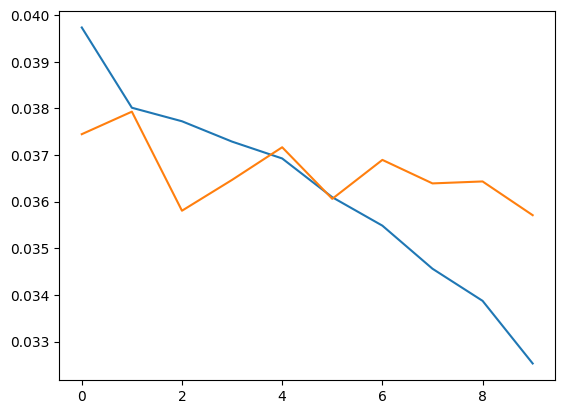

In [49]:
plt.plot(lossi_train)
plt.plot(lossi_val)

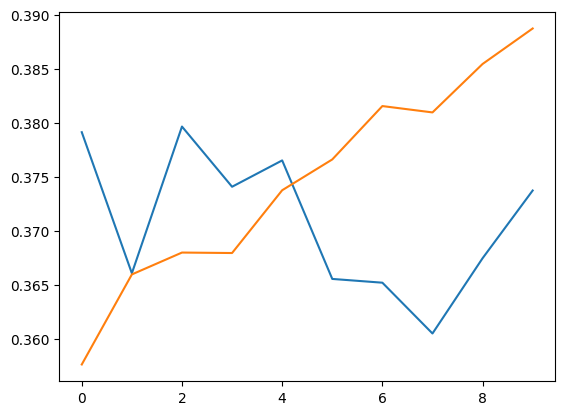

In [50]:
plt.plot(metric_val)
plt.plot(metric_train)

layer 2 (LeakyReluLayer): mean +0.12, std 0.40
layer 6 (LeakyReluLayer): mean +0.30, std 0.64
layer 10 (LeakyReluLayer): mean +0.34, std 0.78
layer 14 (LeakyReluLayer): mean +0.66, std 1.12
layer 18 (LeakyReluLayer): mean +0.03, std 0.13


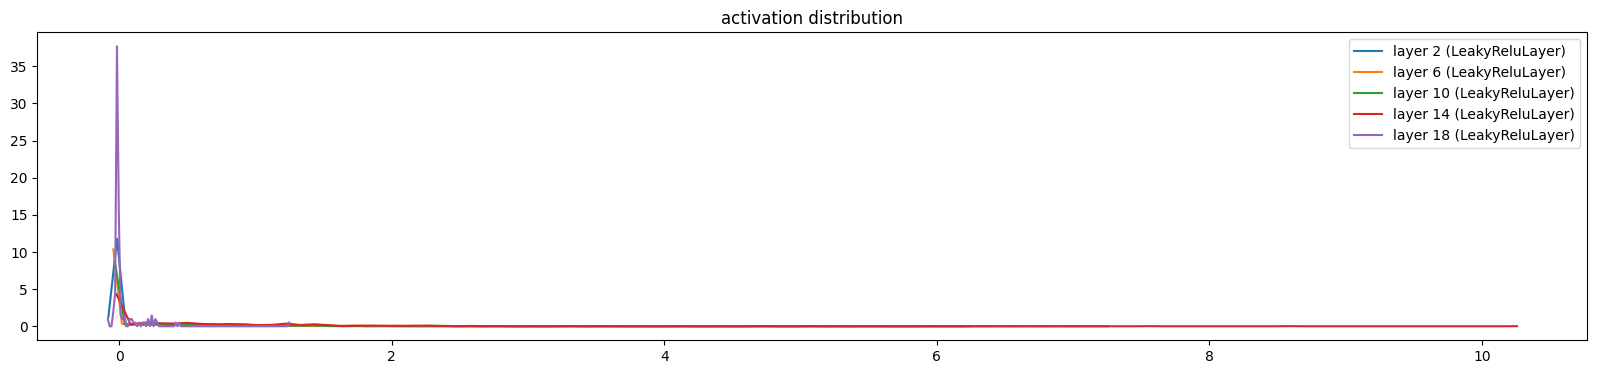

In [51]:
# visualize activations
plt.figure(figsize=(20, 4))
legends = []

if (len(model.layers) > 1):
    for i, layer in enumerate(model.layers): # exclude output layer
        layer_name = layer.__class__.__name__
        for activation_layer in activation_layers:
            if (activation_layer in layer_name):
                t = layer.output.cpu()
                print('layer %d (%10s): mean %+.2f, std %.2f' % (i, layer.__class__.__name__, t.mean(), t.std()))
                hy, hx = torch.histogram(t, density=True)
                plt.plot(hx[:-1].detach(), hy.detach())
                legends.append(f'layer {i} ({layer.__class__.__name__})')
    
    plt.legend(legends)
    plt.title("activation distribution")

layer (LeakyReluLayer: 2): mean -0.000001, std 2.230234e-04
layer (LeakyReluLayer: 6): mean -0.000001, std 7.732764e-05
layer (LeakyReluLayer: 10): mean +0.000001, std 1.097831e-04
layer (LeakyReluLayer: 14): mean -0.000005, std 4.968663e-04
layer (LeakyReluLayer: 18): mean +0.005394, std 4.603374e-02


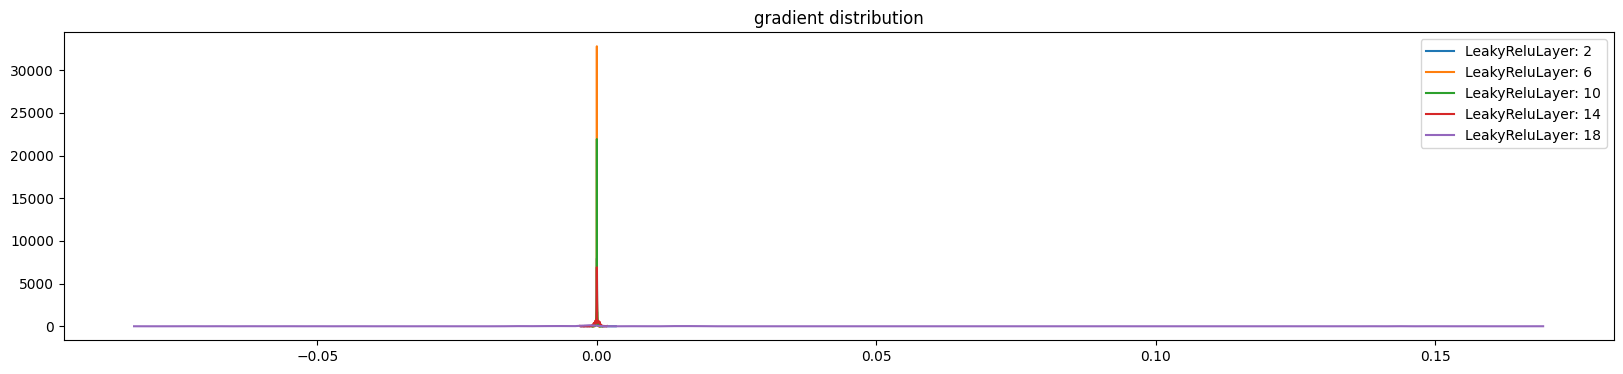

In [52]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []

if (len(model.layers) > 1):
    for layer_name, layer_grad in output_grads[-1].items(): # note: exclude the output
        for activation_layer in activation_layers:
            if (activation_layer in layer_name):
                t = layer_grad.cpu()
                print('layer (%10s): mean %+f, std %e' % (layer_name, t.mean(), t.std()))
                hy, hx = torch.histogram(t, density=True)
                plt.plot(hx[:-1].detach(), hy.detach())
                legends.append(f'{layer_name}')
    
        plt.legend(legends);
        plt.title('gradient distribution')

weight (512, 768) | mean +0.000000 | std 2.339601e-05 | grad:data ratio 4.339953e-05
weight (256, 512) | mean +0.000001 | std 1.274045e-05 | grad:data ratio 2.873743e-05
weight (128, 256) | mean +0.000000 | std 9.087927e-06 | grad:data ratio 2.237787e-05
weight  (32, 128) | mean +0.000000 | std 3.825538e-05 | grad:data ratio 7.777773e-05
weight    (8, 32) | mean -0.000027 | std 3.001504e-04 | grad:data ratio 4.835785e-04
weight     (3, 8) | mean +0.000000 | std 1.461982e-02 | grad:data ratio 1.336007e-02


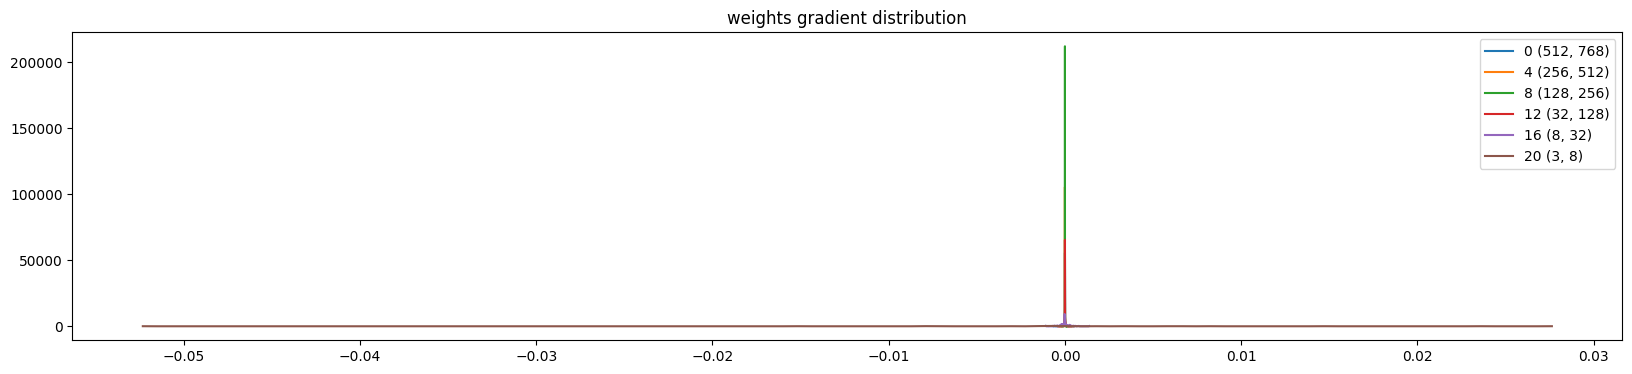

In [53]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i,p in enumerate(model.parameters()):
  if p.ndim == 2: # limit to weights only
    t = p.grad.cpu()
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution');

# gradient to data ratio should be less

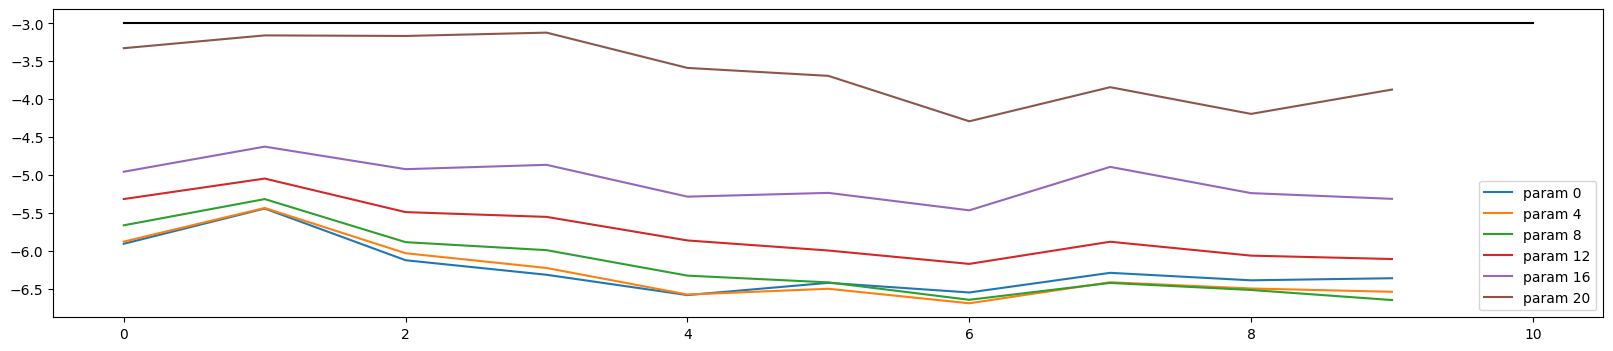

In [54]:
# plot update to data ratio
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(model.parameters()):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
# less than 1e-3 means learning to slow
plt.legend(legends)

In [55]:
model.eval()  # Set model to evaluation mode

# Accuracy calculation
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        labels = labels.argmax(dim=1)
        
        outputs = model(inputs)
        predictions = torch.softmax(outputs, dim=-1).argmax(1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 37.83%


In [56]:
pred = []
with torch.no_grad():  # Disable gradient calculation
    for inputs in pred_loader:
        inputs = inputs.to(device)
    
        outputs = model(inputs)
        predictions = torch.softmax(outputs, dim=-1)
        pred.append(predictions.cpu().squeeze())

In [57]:
df_test = pd.read_csv("/kaggle/input/llm-classification-finetuning/test.csv")
df_test.head()

,id,prompt,response_a,response_b
0,136060,"[""I have three oranges today, I ate an orange ...","[""You have two oranges today.""]","[""You still have three oranges. Eating an oran..."
1,211333,"[""You are a mediator in a heated political deb...","[""Thank you for sharing the details of the sit...","[""Mr Reddy and Ms Blue both have valid points ..."
2,1233961,"[""How to initialize the classification head wh...","[""When you want to initialize the classificati...","[""To initialize the classification head when p..."


In [58]:
df_pred = pd.DataFrame(pred, columns=["winner_model_a", "winner_model_b", "winner_tie"])
df_pred.head()

,winner_model_a,winner_model_b,winner_tie
0,tensor(0.2452),tensor(0.2228),tensor(0.5320)
1,tensor(0.3534),tensor(0.3545),tensor(0.2920)
2,tensor(0.3694),tensor(0.3620),tensor(0.2686)


In [59]:
res = pd.concat([df_test, df_pred], axis=1)
res.head()

,id,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,136060,"[""I have three oranges today, I ate an orange ...","[""You have two oranges today.""]","[""You still have three oranges. Eating an oran...",tensor(0.2452),tensor(0.2228),tensor(0.5320)
1,211333,"[""You are a mediator in a heated political deb...","[""Thank you for sharing the details of the sit...","[""Mr Reddy and Ms Blue both have valid points ...",tensor(0.3534),tensor(0.3545),tensor(0.2920)
2,1233961,"[""How to initialize the classification head wh...","[""When you want to initialize the classificati...","[""To initialize the classification head when p...",tensor(0.3694),tensor(0.3620),tensor(0.2686)


In [60]:
res.to_csv("pred.csv")